<h3>Random Forest Classifier - Respondent 1 </h3>

<h2>Pre-processing</h2>

In [3]:
import pandas as pd

# Load the CSV file
file_path = '001-b45731a0_emotions_with_cognitive_tesk_and_screen.csv'
data = pd.read_csv(file_path)

# Print the column names
print("Column names:")
print(data.columns)

# Drop rows with NaN values in the target column
data = data.dropna(subset=['Cognitive Task'])
data.head()


Column names:
Index(['Timestamp', 'Anger', 'Contempt', 'Disgust', 'Fear', 'Joy', 'Sadness',
       'Surprise', 'Engagement', 'Valence', 'Sentimentality', 'Confusion',
       'Cognitive Task', 'Screens'],
      dtype='object')


,Timestamp,Anger,Contempt,Disgust,Fear,Joy,Sadness,Surprise,Engagement,Valence,Sentimentality,Confusion,Cognitive Task,Screens
3705,162011.0,0.125566,0.136948,0.021518,0.116770,0.041248,0.112264,0.059114,0.328766,0.0,0.976782,0.036977,Data Exploration,Map
3706,162044.0,0.125566,0.137617,0.021531,0.132963,0.040812,0.112249,0.067522,0.328766,0.0,0.911952,0.034095,Data Exploration,Map
3707,162076.0,0.125566,0.137096,0.021582,0.169795,0.040925,0.111568,0.087434,0.328766,0.0,0.831274,0.026797,Data Exploration,Map
3708,162108.0,0.125566,0.136868,0.021714,0.218535,0.041063,0.111219,0.114075,0.328766,0.0,0.829263,0.019318,Data Exploration,Map
3709,162140.0,0.125566,0.137239,0.021806,0.256706,0.040785,0.110944,0.135015,0.328766,0.0,0.773583,0.014509,Data Exploration,Map


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the CSV file
file_path = '001-b45731a0_emotions_with_cognitive_tesk_and_screen.csv'
data = pd.read_csv(file_path)

# Drop rows with NaN values in the target column
data = data.dropna(subset=['Cognitive Task'])
print(data.head())

# Identify numeric and categorical features
# Identify numeric and categorical features, excluding the target variable
all_columns = data.columns.tolist()
target_column = 'Cognitive Task'
all_columns.remove(target_column)
numeric_features = data[all_columns].select_dtypes(include=['int64', 'float64']).columns
categorical_features = data[all_columns].select_dtypes(include=['object']).columns


# Exclude the target column from the numeric features
numeric_features = numeric_features.drop('Cognitive Task', errors='ignore')

# Define the preprocessing steps for numeric and categorical features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine the preprocessing steps into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Preprocess the data
y = data['Cognitive Task']
X = data.drop('Cognitive Task', axis=1)
X_preprocessed = preprocessor.fit_transform(X)

# Get the transformed feature names for the categorical columns
cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)

# Combine the numeric and transformed categorical feature names
all_feature_names = list(numeric_features) + list(cat_feature_names)

# Convert the preprocessed data back to a DataFrame
X_preprocessed = pd.DataFrame(X_preprocessed, columns=all_feature_names)

# Reset the index of y
y.reset_index(drop=True, inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


      Timestamp     Anger  Contempt   Disgust      Fear       Joy   Sadness  \
3705   162011.0  0.125566  0.136948  0.021518  0.116770  0.041248  0.112264   
3706   162044.0  0.125566  0.137617  0.021531  0.132963  0.040812  0.112249   
3707   162076.0  0.125566  0.137096  0.021582  0.169795  0.040925  0.111568   
3708   162108.0  0.125566  0.136868  0.021714  0.218535  0.041063  0.111219   
3709   162140.0  0.125566  0.137239  0.021806  0.256706  0.040785  0.110944   

      Surprise  Engagement  Valence  Sentimentality  Confusion  \
3705  0.059114    0.328766      0.0        0.976782   0.036977   
3706  0.067522    0.328766      0.0        0.911952   0.034095   
3707  0.087434    0.328766      0.0        0.831274   0.026797   
3708  0.114075    0.328766      0.0        0.829263   0.019318   
3709  0.135015    0.328766      0.0        0.773583   0.014509   

        Cognitive Task Screens  
3705  Data Exploration     Map  
3706  Data Exploration     Map  
3707  Data Exploration     Ma

C:\Users\user\AppData\Local\Temp\ipykernel_15404\3893587019.py:45: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = data.drop('Cognitive Task', 'Timestamp', axis=1)


TypeError: DataFrame.drop() got multiple values for argument 'axis'

<h2>Random Forest Classifier</h2>

Confusion Matrix:
 [[4500    0    0    0    0   13    2]
 [   0 1326    0    0    0    3    0]
 [   0    0  130    0    0    0    0]
 [   0    0    0 1473    0    0    3]
 [   0    0    0    0 1524    5    0]
 [   1    0    0    0    1 4210    0]
 [   0    0    0    1    0    0 1936]]

Classification Report:
                      precision    recall  f1-score   support

     Assess Results       1.00      1.00      1.00      4515
           Conclude       1.00      1.00      1.00      1329
   Data Exploration       1.00      1.00      1.00       130
              Focus       1.00      1.00      1.00      1476
Generate Hypothesis       1.00      1.00      1.00      1529
           Set Goal       1.00      1.00      1.00      4212
    Test Hypothesis       1.00      1.00      1.00      1937

           accuracy                           1.00     15128
          macro avg       1.00      1.00      1.00     15128
       weighted avg       1.00      1.00      1.00     15128


Accuracy Score

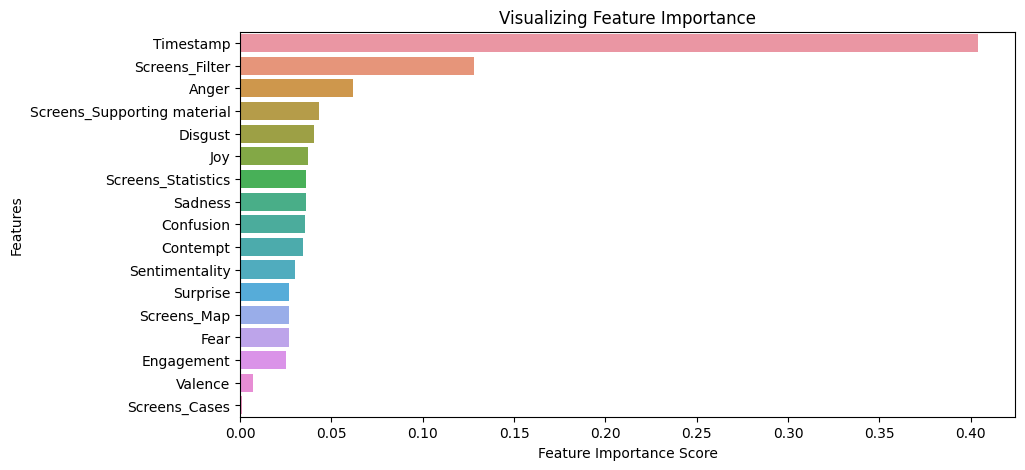

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Plot the feature importance
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=all_feature_names).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Feature Importance')
plt.show()
